In [80]:
#lade libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#print(tf.__version__)

In [81]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [82]:
#dataset laden, hier hochladen aus importierten sklearn datasets
cancer = datasets.load_breast_cancer()
#print (cancer.DESCR) #print details für infos

In [83]:
X = pd.DataFrame(data = cancer.data, columns = cancer.feature_names) #check with X.head()
y = cancer.target
#y = cancer.target_names # Ausgabe was ist 0 und 1
y #Ausgabe y bzw belign/malignant als numerischer Wert

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [84]:
#Überprüfe Dataset Aufbau/Infos
#X.shape
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [85]:
#Definition: Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0, stratify = y)
X_train.shape

(455, 30)

In [86]:
#convert to numpy array, damit reshape geht
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
#2D Array -> 3D Array, reshape numpy array
X_train = X_train.reshape(455, 30, 1)
X_test = X_test.reshape(114, 30, 1)

In [88]:
epochs = 100 #Festlegung epochs für NN
model = Sequential ()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(30,1) ) )
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu' ) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_12 (Batc (None, 29, 32)            128       
_________________________________________________________________
dropout_18 (Dropout)         (None, 29, 32)            0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_13 (Batc (None, 28, 64)            256       
_________________________________________________________________
dropout_19 (Dropout)         (None, 28, 64)            0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1792)             

In [89]:
model.compile(optimizer = Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
15/15 [==============================] - 0s 16ms/step - loss: 1.1123 - accuracy: 0.4923 - val_loss: 0.6823 - val_accuracy: 0.6140
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 0.7358 - accuracy: 0.6462 - val_loss: 0.6562 - val_accuracy: 0.8509
Epoch 3/100
15/15 [==============================] - 0s 9ms/step - loss: 0.5859 - accuracy: 0.7187 - val_loss: 0.6280 - val_accuracy: 0.9035
Epoch 4/100
15/15 [==============================] - 0s 9ms/step - loss: 0.5040 - accuracy: 0.7231 - val_loss: 0.5990 - val_accuracy: 0.9123
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 0.4043 - accuracy: 0.8374 - val_loss: 0.5691 - val_accuracy: 0.9298
Epoch 6/100
15/15 [==============================] - 0s 9ms/step - loss: 0.3577 - accuracy: 0.8396 - val_loss: 0.5370 - val_accuracy: 0.9211
Epoch 7/100
15/15 [==============================] - 0s 9ms/step - loss: 0.3587 - accuracy: 0.8462 - val_loss: 0.5059 - val_accuracy: 0.9123
Epoch 8/100


In [90]:
def plot_learningCurve(history, epoch):
  #plot training and validiation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show
def plot_learningCurve2(history, epoch):
  #plot training and validation loss values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show

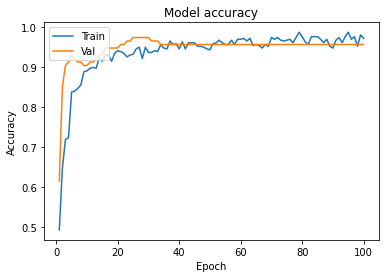

In [91]:
plot_learningCurve(history, epochs)

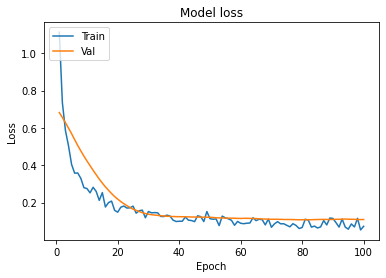

In [92]:
plot_learningCurve2(history, epochs)